In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import time

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [15, 15]

---

# 가공 데이터 없을 시 수행

### 데이터 로드

In [4]:
dfmember = pd.read_csv('./table/member.csv')
dfpointsum = pd.read_csv('./table/point_sum_info.csv')
dfdata = pd.read_csv('./table/190401-200531_prj_data.csv')

C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,24,26,27,35,42,46,51,52,53,67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dfdata['work_user'] = dfdata['work_user'].apply(lambda x:round(x))
dfdata['check_user'] = dfdata['check_user'].apply(lambda x:round(x) if not math.isnan(x) else 0)
memlist = np.unique(np.concatenate((dfdata['work_user'].unique(), dfdata[dfdata['check_user']!=0]['check_user'].unique()), axis=0))
dfdata

data_idx  prj_idx  project_id  invalid_yn  problem_yn  \
0        16640431      930      1091.0         0.0           0   
1        16640433      930      1091.0         0.0           0   
2        16640436      930      1091.0         0.0           0   
3        16640437      930      1091.0         0.0           0   
4        16640439      930      1091.0         0.0           0   
...           ...      ...         ...         ...         ...   
7073358  26337854     6996      2594.0         0.0           0   
7073359  26333002     6996      2594.0         0.0           0   
7073360  26333160     6996      2594.0         0.0           0   
7073361  26333349     6996      2594.0         0.0           0   
7073362  26337419     6996      2594.0         0.0           0   

         work_object_number  work_user           work_sdate  \
0                       1.0      11343  2019-04-16 15:20:54   
1                       1.0      11343  2019-04-16 15:21:18   
2                       1.0      11343  2019-04-16 15:21:52   
3                       1.0      11343  2019-04-16 15:22:02   
4                       1.0      11343  2019-04-16 15:22:26   
...                     ...        ...                  ...   
7073358               978.0     137580  2020-05-31 14:12:27   
7073359               543.0     143786  2020-05-29 21:15:30   
7073360               528.0     143786  2020-05-30 01:27:17   
7073361              1715.0     143786  2020-05-30 17:18:31   
7073362                93.0     151332  2020-05-31 02:25:25   

                  work_edate work_point_type_cd  work_point  check_user  \
0        2019-04-16 15:21:06         POINT_SAVE       500.0       17642   
1        2019-04-16 15:21:26         POINT_SAVE       500.0       17642   
2        2019-04-16 15:22:00         POINT_SAVE       500.0       17642   
3        2019-04-16 15:22:13         POINT_SAVE       500.0       17642   
4        2019-04-16 15:22:34         POINT_SAVE       500.0       17642   
...                      ...                ...         ...         ...   
7073358  2020-05-31 16:24:54         POINT_SAVE     15648.0       25836   
7073359  2020-05-29 21:16:20         POINT_SAVE      8688.0       25836   
7073360  2020-05-30 01:28:10         POINT_SAVE      8448.0       25836   
7073361  2020-05-30 18:19:34         POINT_SAVE     27440.0       25836   
7073362  2020-05-31 02:37:51       POINT_SECURE      1488.0           0   

                 check_sdate          check_edate check_point_type_cd  \
0        2019-04-16 18:01:53  2019-04-16 18:02:02          POINT_SAVE   
1        2019-04-16 18:02:16  2019-04-16 18:02:23          POINT_SAVE   
2        2019-04-16 18:02:34  2019-04-16 18:02:43          POINT_SAVE   
3        2019-04-16 18:02:43  2019-04-16 18:02:50          POINT_SAVE   
4        2019-04-16 18:02:58  2019-04-16 18:03:07          POINT_SAVE   
...                      ...                  ...                 ...   
7073358  2020-05-31 17:33:24  2020-05-31 17:34:58          POINT_SAVE   
7073359  2020-05-29 22:51:19  2020-05-29 22:53:08          POINT_SAVE   
7073360  2020-05-30 01:32:24  2020-05-30 01:33:29          POINT_SAVE   
7073361  2020-05-30 18:41:06  2020-05-30 18:51:50          POINT_SAVE   
7073362                  NaN                  NaN                 NaN   

         check_point platform  hold_yn  
0               50.0  android        0  
1               50.0  android        0  
2               50.0  android        0  
3               50.0  android        0  
4               50.0  android        0  
...              ...      ...      ...  
7073358       6846.0       pc        0  
7073359       3801.0       pc        0  
7073360       3696.0       pc        0  
7073361      12005.0       pc        0  
7073362          NaN       pc        0  

[7073363 rows x 18 columns]

### 등급 별 획득 포인트 백트래킹 및 추출

In [7]:
memPoint = dfpointsum[dfpointsum['member_id'].isin(memlist)][['member_id', 'sum_point']].set_index('member_id')
datalist = dfdata.sort_values(by='work_sdate', ascending=False)

In [8]:
def helper(row):
    wid = row['work_user']
    wp = row['work_point']
    workAt = -1
    cid = 0
    cp = 0
    checkAt = -1
    if not math.isnan(wp):
        workAt = memPoint.at[wid, 'sum_point'] - wp
        memPoint.at[wid, 'sum_point'] = workAt
    
    if row['check_user'] != 0:
        cid = row['check_user']
        cp = row['check_point']
        if not math.isnan(cp):
            checkAt = memPoint.at[cid, 'sum_point'] - cp
            memPoint.at[cid, 'cum_point'] = checkAt
        
    return wid, wp, workAt, row['work_edate'], cid, cp, checkAt, row['check_edate']
    
res = datalist.apply(helper, axis=1)

out = res.apply(pd.Series)
out.columns=['work_user', 'work_point', 'work_at', 'work_edate', 'check_user', 'check_point', 'check_at', 'check_edate']
out = out.reset_index(drop=True)
out.to_csv('table/analy_grade_raw.csv')

---

# 가공 데이터 로드

In [ ]:
out = pd.read_csv('table/analy_grade_raw.csv')

In [9]:
# 등급 기준 시나리오에 맞게 변경하여 수행
def getGradeIdx(point):
    if point < 3000:
        return 0
    elif point < 10000:
        return 1
    elif point < 30000:
        return 2
    elif point < 100000:
        return 3
    elif point < 300000:
        return 4
    elif point < 1000000:
        return 5
    else:
        return 6
    
def getGrade(idx):
    if idx==0:
        return 'STARTER'
    elif idx==1:
        return 'BRONZE'
    elif idx==2:
        return 'BRONZE_PLUS'
    elif idx==3:
        return 'SILVER'
    elif idx==4:
        return 'SILVER_PLUS'
    elif idx==5:
        return 'GOLD'
    elif idx==6:
        return 'GOLD_PLUS'
    else:
        return 'NONE'
    
out['work_grade'] = out['work_at'].apply(getGradeIdx)

# 등급 별 작업 포인트 분석

### 최근 3개월 간 일별, 등급별로 작업자 수, 총 획득 포인트, 작업자 당 평균 획득 포인트를 산출
### 위 분석 결과를 토대로 현재 등급 기준의 적절성과 문제점 등을 파악하고자 함

In [10]:
wdf = out[['work_user', 'work_point', 'work_grade', 'work_edate']].dropna()
wdf = wdf[wdf['work_point']!=0]
#cdf = out[['check_user', 'check_point', 'check_grade', 'check_edate']].dropna()
#cdf = cdf[cdf['check_point']!=0]

In [11]:
wdf['work_date'] = pd.to_datetime(wdf['work_edate']).dt.date
grp = wdf.groupby(['work_date', 'work_grade'])
cnt = grp.work_user.nunique()
pnt = grp.work_point.sum()
t = pd.concat([cnt, pnt], axis=1).reset_index()
t['point_person'] = t['work_point'] / t['work_user']
t['work_grade_cd'] = t['work_grade'].apply(getGrade)

In [12]:
startdate = datetime.date(2020,3,1)
enddate = datetime.date(2020,6,1)
df = t[(t['work_date']>=startdate) & (t['work_date']<enddate)]

## 등급 별 하루 평균 작업자 수
STARTER 등급의 작업자 수가 가장 많으며, 최근 한 달 내에 GOLD_PLUS의 수가 두 번째로 많다.
최근 실질적으로 프로젝트에 참여하는 작업자 수가 줄어들고 있으며 이는 기존 작업자의 이탈, 적은 신규 작업자 유입이 원인으로 보인다

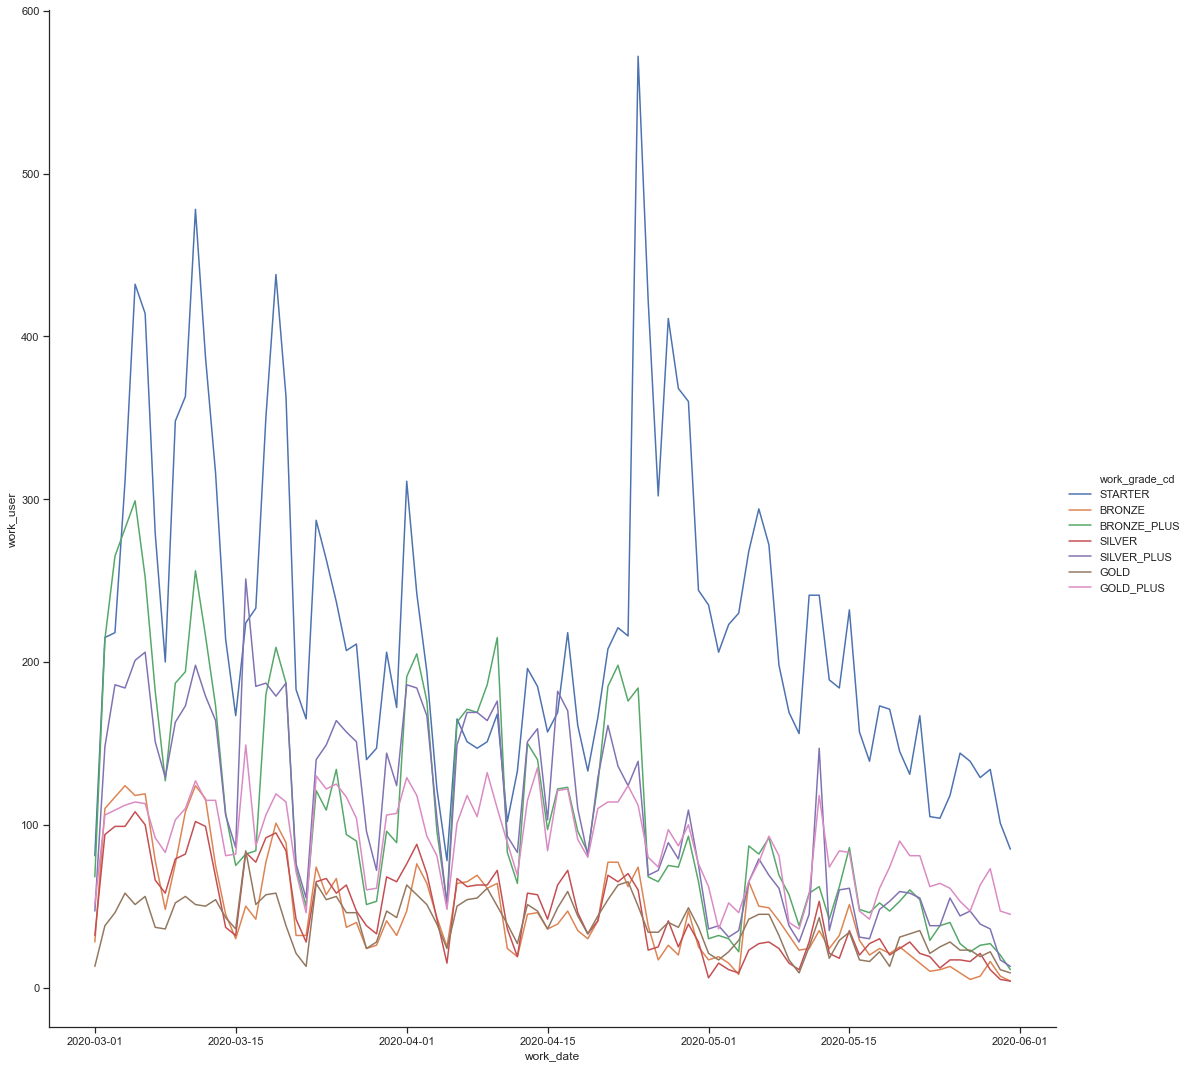

In [171]:
sns.relplot(x='work_date', y='work_user', hue='work_grade_cd', kind='line', markers=True, data=df, height=15)

In [174]:
df[['work_grade_cd', 'work_user']].groupby('work_grade_cd').describe()

work_user                                                      \
                  count        mean        std   min     25%    50%     75%   
work_grade_cd                                                                 
BRONZE             92.0   46.315217  30.787799   4.0   24.00   39.5   64.25   
BRONZE_PLUS        92.0  108.021739  69.579266  11.0   53.00   86.5  171.50   
GOLD               92.0   38.902174  15.658484   9.0   25.00   39.0   51.00   
GOLD_PLUS          92.0   88.706522  27.628834  36.0   64.75   88.0  113.25   
SILVER             92.0   46.804348  28.013434   4.0   23.00   41.0   67.25   
SILVER_PLUS        92.0  108.260870  58.572369  13.0   55.00  103.5  163.25   
STARTER            92.0  221.760870  97.886834  78.0  154.75  203.0  264.25   

                      
                 max  
work_grade_cd         
BRONZE         124.0  
BRONZE_PLUS    299.0  
GOLD            84.0  
GOLD_PLUS      149.0  
SILVER         108.0  
SILVER_PLUS    251.0  
STARTER        572.0

## 등급 별 하루 총 획득 포인트
GOLD_PLUS 등급의 작업자가 전체 하루 획득 포인트에서 압도적인 점유율을 가지며, 최근 이러한 경향이 점점 심해지고 있다. 전체 획득 포인트 자체도 줄어들고 있는데, 신규 유입 작업자가 거의 없고 참여 가능 작업 수가 적어지는 것이 원인일 수 있다.

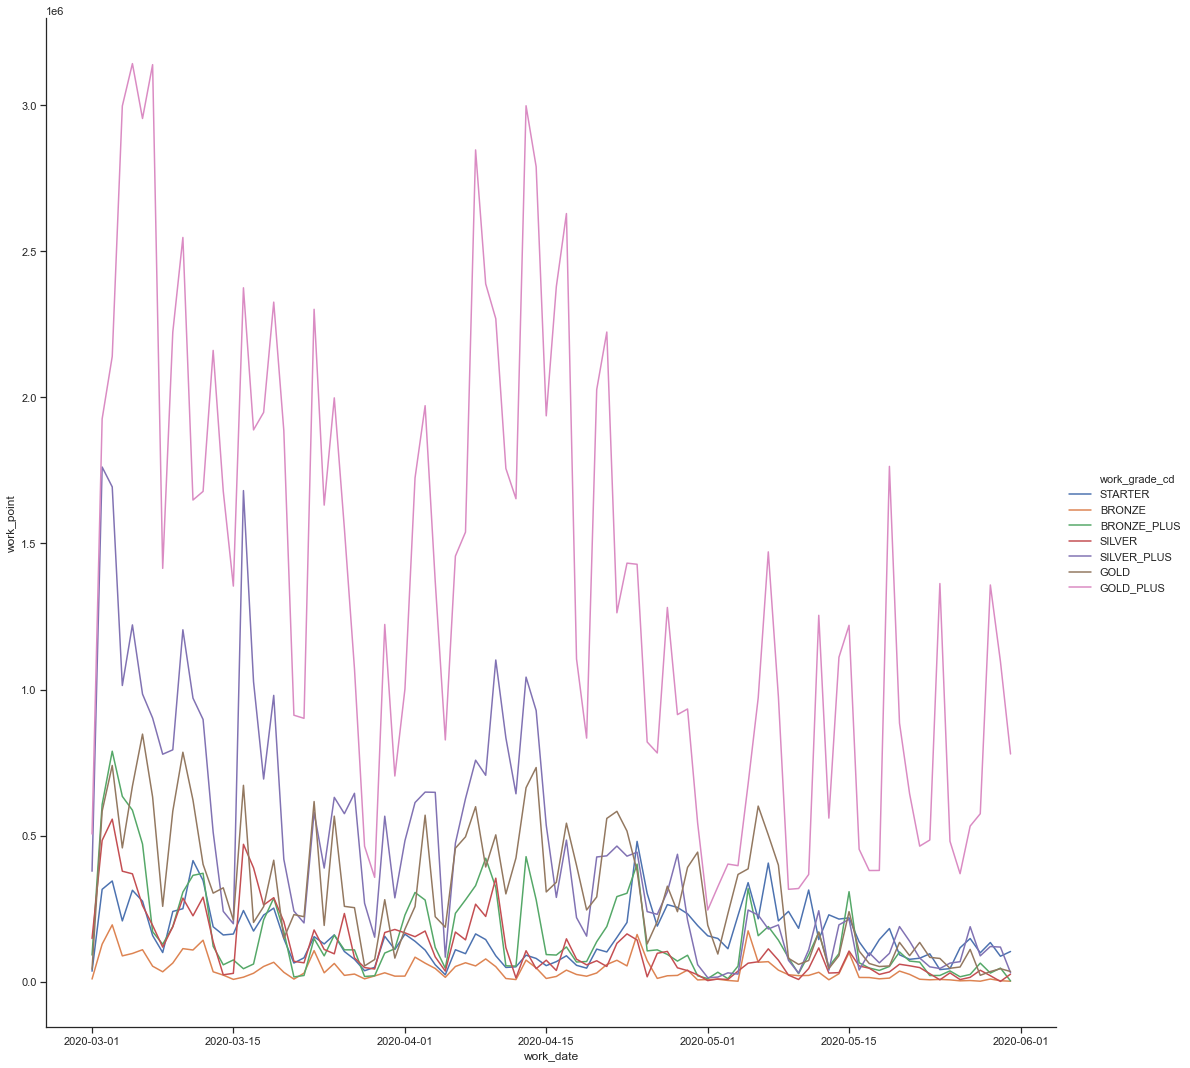

In [172]:
sns.relplot(x='work_date', y='work_point', hue='work_grade_cd', kind='line', markers=True, data=df, height=15)

In [175]:
df[['work_grade_cd', 'work_point']].groupby('work_grade_cd').describe()

work_point                                                    \
                   count          mean            std       min        25%   
work_grade_cd                                                                
BRONZE              92.0  4.156662e+04   40940.282899    1275.0   10604.75   
BRONZE_PLUS         92.0  1.595959e+05  156790.936580    2360.0   52776.50   
GOLD                92.0  3.098801e+05  215705.010267   21465.0  108772.75   
GOLD_PLUS           92.0  1.378218e+06  791939.366430  245005.0  696989.75   
SILVER              92.0  1.206308e+05  118066.295445     605.0   35897.00   
SILVER_PLUS         92.0  4.471452e+05  399904.074828   13466.0  133735.50   
STARTER             92.0  1.612434e+05   94399.336176   23300.0   89945.25   

                                                 
                     50%         75%        max  
work_grade_cd                                    
BRONZE           27763.5    62314.50   194199.0  
BRONZE_PLUS      99637.5   229167.25   788715.0  
GOLD            257255.0   467180.75   847272.0  
GOLD_PLUS      1317425.5  1939904.50  3142834.0  
SILVER           75085.0   168385.00   556150.0  
SILVER_PLUS     297783.0   645449.00  1761710.0  
STARTER         147279.0   215649.50   479977.0

## 등급 별 작업자 당 하루 평균 획득 포인트
총 획득 포인트와 마찬가지로 GOLD_PLUS 등급의 수치가 압도적이다. 아래 결과를 토대로 등급 상승에 소요되는 평균 기간을 구하면 다음과 같다.  
##### BRONZE: 7.0일 
##### BRONZE_PLUS: 6.4일
##### SILVER: 30.0일  
##### SILVER_PLUS: 22.1일
##### GOLD: 110.7일 
##### GOLD_PLUS: 66.9일

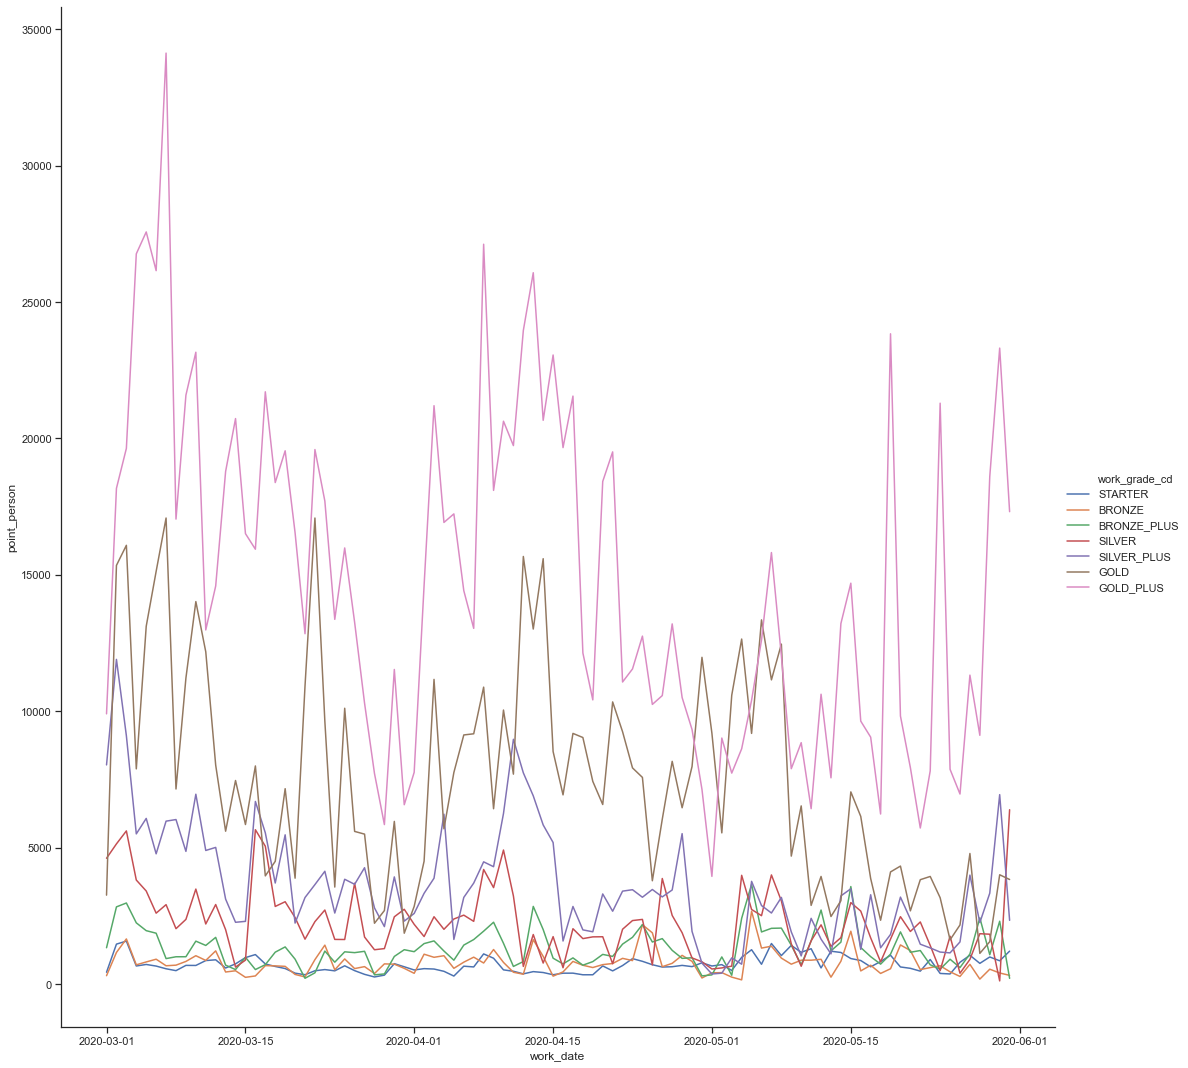

In [173]:
sns.relplot(x='work_date', y='point_person', hue='work_grade_cd', kind='line', markers=True, data=df, height=15)

In [176]:
df[['work_grade_cd', 'point_person']].groupby('work_grade_cd').describe()

point_person                                          \
                     count          mean          std          min   
work_grade_cd                                                        
BRONZE                92.0    784.095355   446.854928   159.375000   
BRONZE_PLUS           92.0   1324.713012   715.021885   214.545455   
GOLD                  92.0   7472.031155  4029.285096  1129.736842   
GOLD_PLUS             92.0  14811.600085  6248.080656  3951.693548   
SILVER                92.0   2263.738765  1289.674416   121.000000   
SILVER_PLUS           92.0   3615.844849  2129.320960   374.055556   
STARTER               92.0    719.607782   295.836470   265.607143   

                                                                      
                       25%           50%           75%           max  
work_grade_cd                                                         
BRONZE          453.769231    713.789536    931.498207   2673.384615  
BRONZE_PLUS     867.552885   1189.661171   1645.072874   3659.885057  
GOLD           3964.758550   7101.113562  10063.958571  17085.000000  
GOLD_PLUS      9782.850355  13316.312912  19559.772287  34122.402174  
SILVER         1563.886905   2034.911159   2771.965343   6395.000000  
SILVER_PLUS    2207.838588   3257.508333   4800.720539  11903.445946  
STARTER         496.100379    666.010566    874.636679   1579.990826

# 고찰

최근 이탈 작업자 수가 늘고 신규 유입이 줄어드는 현상과 관련하여 가장 큰 원인으로 신규 작업자가 할 수 있는 일이 매우 적다는 사실에 주목하였다. 더 많은 프로젝트에 참여하기 위해서는 등급을 상승시켜야 하는데, 위의 원인으로 초기에 등급을 상승시키는 것이 매우 어려워 보인다. 평균적으로 STARTER 등급의 작업자는 하루에 700 포인트 가량을 얻을 뿐이며, BRONZE 등급이 되기까지 7일 정도가 소요된다. 이 기간은 신규 작업자가 크라우드웍스 작업에 흥미를 잃게 하는 데 큰 원인으로 작용한다고 생각된다.

또한 현 등급 기준의 문제점으로 기준 점수가 5000, 10000, 50000, 100000, ... 와 같은 방식으로 상승폭이 급변하는 데에 있다고 생각된다. BRONZE_PLUS 에서 SILVER 등급이 되기 위해서는 이전에 BRONZE 에서 BRONZE_PLUS 등급을 얻기까지 포인트의 8배 가량을 더 획득해야 하며, 이 과정이 작업자에게 굉장이 지루하게 느껴질 수 있다.

등급 기준 점수를 3000, 10000, 30000, 100000, ... 와 같이 조정한다면 STARTER 등급에 머무는 기간이 짧아짐과 동시에 등급 간 기준치 증가 비율도 2.8~3.5배 정도로 일정하게 유지할 수 있다. 아래 예시는 등급 기준이 위와 같다고 가정했을 때 전 등급에서 해당 등급으로의 평균 상승 소요기간과 등급별 작업자 당 하루 평균 획득 포인트 통계 자료를 대략적으로 나타낸 것이다.

##### BRONZE: 4.2일 
##### BRONZE_PLUS: 9.7일
##### SILVER: 16.5일  
##### SILVER_PLUS: 36.1일
##### GOLD: 63.6일 
##### GOLD_PLUS: 114.6일

In [14]:
df[['work_grade_cd', 'point_person']].groupby('work_grade_cd').describe()

point_person                                          \
                     count          mean          std          min   
work_grade_cd                                                        
BRONZE                92.0    721.482781   441.426239   166.153846   
BRONZE_PLUS           92.0   1215.196173   668.736054   132.000000   
GOLD                  92.0   6108.341633  2886.170566   908.750000   
GOLD_PLUS             92.0  14811.600085  6248.080656  3951.693548   
SILVER                92.0   1937.061259   976.233470   295.263158   
SILVER_PLUS           92.0   3147.189439  2065.871438   231.020833   
STARTER               92.0    715.937958   314.233748   275.623932   

                                                                      
                       25%           50%           75%           max  
work_grade_cd                                                         
BRONZE          424.437711    617.617794    904.074360   2766.363636  
BRONZE_PLUS     756.403937   1105.287157   1608.815421   3631.884058  
GOLD           3681.687865   6055.858424   7987.593597  14714.617647  
GOLD_PLUS      9782.850355  13316.312912  19559.772287  34122.402174  
SILVER         1302.094130   1886.262927   2419.955946   4930.508475  
SILVER_PLUS    1521.722454   2905.778070   3808.256741  11490.341880  
STARTER         475.786525    646.600693    896.790409   1538.536913

신규 작업자 중 이탈자의 대부분이 한두 번 작업을 진행해보고 서비스 이용을 중단하는 경우가 많다는 것을 감안했을 때, 실제 의욕이 있는 신규 작업자라면 2~3일 이내에 BRONZE 등급으로 오를 수 있을 것으로 보인다. 이처럼 BRONZE 등급의 기준을 조금 완화함으로써 신규 유입 작업자의 이탈율을 다소 낮출 수 있을 것이라 생각된다.

또한 각 등급간의 증가 비율을 일정하게 조절함으로써, 등급 별 하루 평균 작업자 수를 대체로 균등하게 유지할 수 있었다. 아래는 그 통계 자료와 그래프를 나타낸 것이다.

In [17]:
df[['work_grade_cd', 'work_user']].groupby('work_grade_cd').describe()

work_user                                                      \
                  count        mean        std   min     25%    50%     75%   
work_grade_cd                                                                 
BRONZE             92.0   78.750000  46.566418   9.0   47.75   65.5   96.50   
BRONZE_PLUS        92.0   69.434783  47.092452   5.0   34.75   57.0  107.00   
GOLD               92.0   74.967391  33.793312  16.0   42.25   72.5  107.25   
GOLD_PLUS          92.0   88.706522  27.628834  36.0   64.75   88.0  113.25   
SILVER             92.0   85.836957  50.965465  10.0   42.00   75.0  124.75   
SILVER_PLUS        92.0   72.391304  40.740389   6.0   35.00   66.5  111.75   
STARTER            92.0  192.576087  89.140861  68.0  134.50  174.0  229.75   

                      
                 max  
work_grade_cd         
BRONZE         207.0  
BRONZE_PLUS    203.0  
GOLD           176.0  
GOLD_PLUS      149.0  
SILVER         207.0  
SILVER_PLUS    159.0  
STARTER        556.0

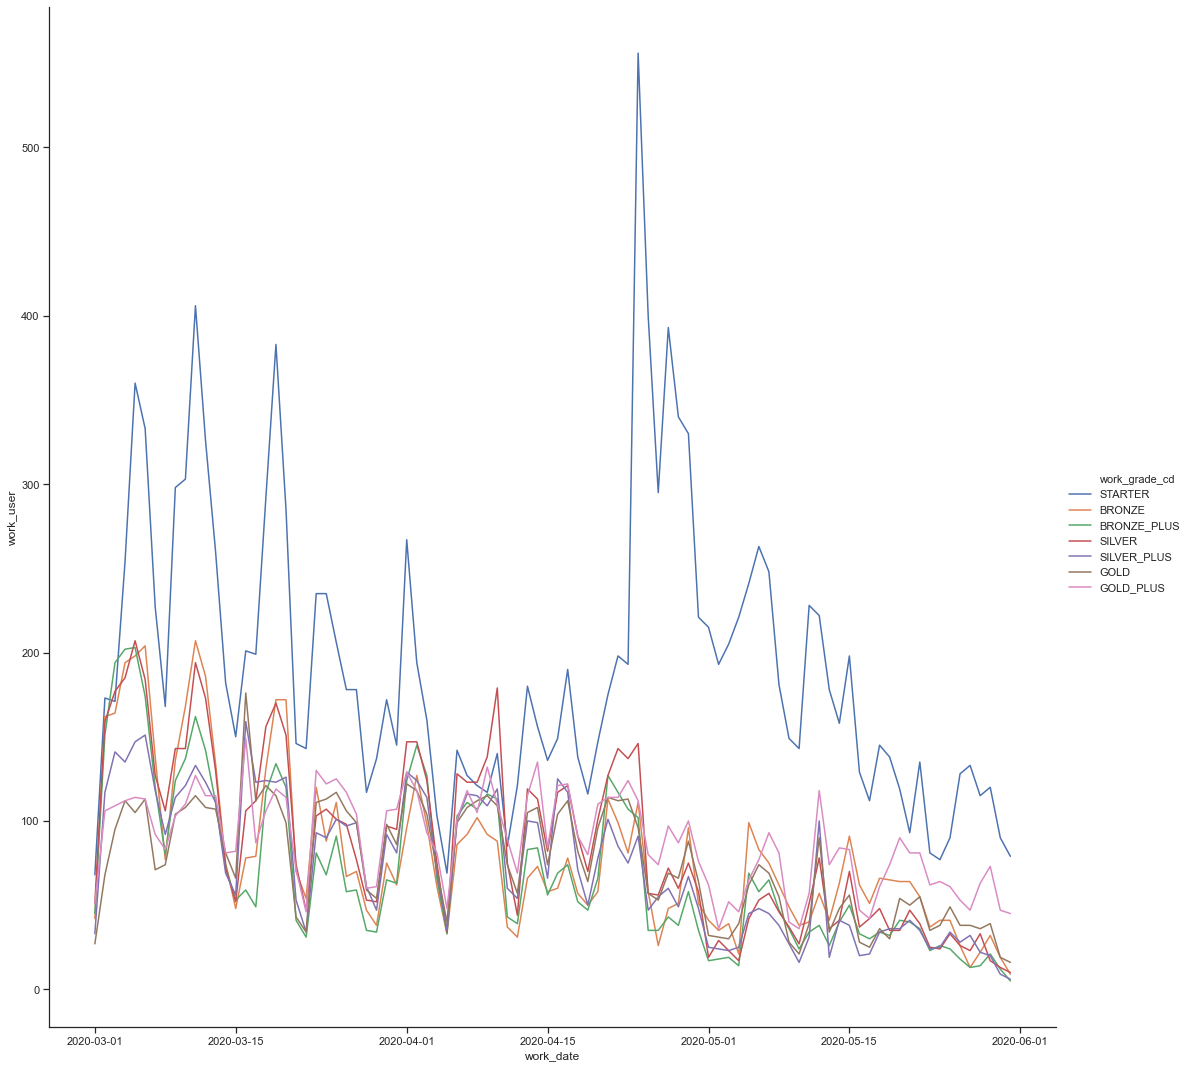

In [18]:
sns.relplot(x='work_date', y='work_user', hue='work_grade_cd', kind='line', markers=True, data=df, height=15)

결론적으로 등급 기준 조정 시 일반 등급과 PLUS 등급 간의 불균형을 해소함과 동시에, 작업자가 특정 등급 구간에 지나치게 오래 머문다고 느끼지 않게끔 할 수 있을 것이다.

물론 누적 포인트만으로 등급을 산정하는 현재의 방식 자체가 바람직하지 않다. 오랫동안 작업을 진행해온 GOLD_PLUS 작업자의 획득 포인트 비중이 압도적으로 많으며, 최근의 작업 성과나 성실도 등은 거의 반영이 되지 않기 때문에 GOLD_PLUS 등급 미만의 작업자가 주기적으로 이탈하는 원인이 된다. 새로운 등급 산정 방법에 관한 연구는 다음에 진행하도록 한다.